<a href="https://colab.research.google.com/github/hakim733/AI-project/blob/main/AI_project_v0_09_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Install ipywidgets in Google Colab
#!pip install ipywidgets
#from ipywidgets import interact # decorator helps me analyse datasets 3x faster
import pandas as pd
import numpy as nm
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# ***Loading and pre-processing data sets this is a test***

In [35]:


# 1. Load historical_volume.csv
historical_volume_url = 'https://drive.google.com/uc?id=1JA9RL0HFzcqzLfXFPeELLgJW8IS7om0G&export=download'
historical_volume = pd.read_csv(historical_volume_url, on_bad_lines='skip')
# 1.1 cleaning
historical_volume.dropna()
historical_volume.fillna(0, method=None, inplace=False)
historical_volume.head()





,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.2720
1,Agency_22,SKU_02,201301,110.7000
2,Agency_58,SKU_23,201301,0.0000
3,Agency_48,SKU_07,201301,28.3200
4,Agency_22,SKU_05,201301,238.5387


In [36]:
price_sales_promotion_url = 'https://drive.google.com/uc?id=1h5n9ev5gJPn2HtReDxOvy6VKda5TM5-e&export=download'

# Load the CSV from Google Drive
price_sales_promotion = pd.read_csv(price_sales_promotion_url)
# 1.1 cleaning
price_sales_promotion.dropna()
price_sales_promotion.fillna(0, method=None, inplace=False)
#historical_volume.info()
#historical_volume.head()


,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470
...,...,...,...,...,...,...
20995,Agency_49,SKU_34,201703,1495.906780,1438.732203,57.174577
20996,Agency_49,SKU_34,201705,1495.906780,1499.468196,3.561416
20997,Agency_49,SKU_34,201707,1495.906780,1462.387752,33.519028
20998,Agency_49,SKU_34,201709,1495.906780,1407.814407,88.092373


In [37]:
# 2. Load demographics.csv
demographics_url = 'https://drive.google.com/uc?id=1RwQpmf4ZiwFRT24T4FieWCezlGDNVCxe&export=download'
demographics = pd.read_csv(demographics_url, on_bad_lines='skip')
# 2.1 cleaning
demographics.dropna()
demographics.fillna(0, method=None, inplace=False)
demographics.head()



,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809
2,Agency_55,2025793,238553
3,Agency_53,1729177,111048
4,Agency_50,2057678,144594


In [38]:
# 3. Load industry_soda_sales.csv
industry_soda_sales_url = 'https://drive.google.com/uc?id=1njzOqoW2oGDml7d3cND8VfN24m_RFUnm&export=download'
industry_soda_sales = pd.read_csv(industry_soda_sales_url, on_bad_lines='skip')
# 3.1 cleaning
industry_soda_sales.dropna()
industry_soda_sales.fillna(0, method=None, inplace=False)
industry_soda_sales.head()



,YearMonth,Soda_Volume
0,201301,718394219
1,201302,753938444
2,201303,892192092
3,201304,838099501
4,201305,864420003


In [39]:
# 4. Load industry_volume.csv
industry_volume_url = 'https://drive.google.com/uc?id=1WmrPOWs5_kOOPO-xfT-gbxnzXf9Ornns&export=download'
industry_volume = pd.read_csv(industry_volume_url, on_bad_lines='skip')
# 4.4 cleaning
industry_volume.dropna()
industry_volume.fillna(0, method=None, inplace=False)
industry_volume.head()



,YearMonth,Industry_Volume
0,201301,492612703
1,201302,431937346
2,201303,509281531
3,201304,532390389
4,201305,551755254


In [40]:
# 5. Load price_sales_promotion.csv
price_sales_promotion_url = 'https://drive.google.com/uc?id=1h5n9ev5gJPn2HtReDxOvy6VKda5TM5-e&export=download'
price_sales_promotion = pd.read_csv(price_sales_promotion_url, on_bad_lines='skip')
# 5.1 cleaning
price_sales_promotion.dropna()
price_sales_promotion.fillna(0, method=None, inplace=False)
price_sales_promotion.head()


,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470


In [41]:
# 6. Load weather.csv
weather_url = 'https://drive.google.com/uc?id=1ielLZYBmek-lR0C9PnJfjNM1kwlHzm8B&export=download'
weather = pd.read_csv(weather_url, on_bad_lines='skip')
# 6.1 cleaning
weather.fillna(0, method=None, inplace=False)
weather.head()

,YearMonth,Agency,Avg_Max_Temp
0,201301,Agency_01,17.072
1,201302,Agency_01,19.984
2,201303,Agency_01,24.600
3,201304,Agency_01,27.532
4,201305,Agency_01,29.396


In [42]:
# 7. Load event calendar
event_calendar_url = 'https://drive.google.com/uc?id=1wChKn7gjqSKU8AryJdNX_lb7B8qqhEOM&export=download'
event_calendar = pd.read_csv(event_calendar_url , on_bad_lines='skip')

# 7.1 Cleaning
event_calendar.fillna(0, method=None, inplace=False)
event_calendar.head()


,YearMonth,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
0,201301,0,0,1,0,0,0,0,0,0,0,0,0
1,201302,0,0,0,0,0,0,0,0,0,0,0,0
2,201303,1,1,0,0,0,0,0,0,0,0,0,1
3,201304,0,0,0,0,0,0,0,0,0,0,0,0
4,201305,0,0,0,0,1,0,0,0,0,0,0,0


## Merging the data sets



In [43]:
# Merge price_sales_promotion with historical_volume on ['Agency', 'SKU', 'YearMonth']
merged_data = pd.merge(price_sales_promotion, historical_volume, on=['Agency', 'SKU', 'YearMonth'], how='left')


In [44]:
# Merge with industry_soda_sales on ['YearMonth']
merged_data = pd.merge(merged_data, industry_soda_sales, on=['YearMonth'], how='left')

In [45]:
# Merge with demographics on ['Agency'] (assuming demographics data is by agency)
data_set = pd.merge(merged_data, demographics, on=['Agency'], how='left')

In [46]:
# Merge with event_calendar on ['YearMonth']
data = pd.merge(data_set, event_calendar, on='YearMonth', how='left')


In [47]:
data = pd.merge(data, weather, on=['YearMonth', 'Agency'], how='left')


# The final merged data set to be working with



In [48]:
data.head()

,Agency,SKU,YearMonth,Price,Sales,Promotions,Volume,Soda_Volume,Avg_Population_2017,Avg_Yearly_Household_Income_2017,...,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest,Avg_Max_Temp
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269,80.676,718394219,153733,120207,...,0,0,0,0,0,0,0,0,0,17.072
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805,98.064,753938444,153733,120207,...,0,0,0,0,0,0,0,0,0,19.984
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187,133.704,892192092,153733,120207,...,0,0,0,0,0,0,0,0,1,24.600
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143,147.312,838099501,153733,120207,...,0,0,0,0,0,0,0,0,0,27.532
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470,175.608,864420003,153733,120207,...,0,1,0,0,0,0,0,0,0,29.396


In [49]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            21000 non-null  object 
 1   SKU                               21000 non-null  object 
 2   YearMonth                         21000 non-null  int64  
 3   Price                             21000 non-null  float64
 4   Sales                             21000 non-null  float64
 5   Promotions                        21000 non-null  float64
 6   Volume                            21000 non-null  float64
 7   Soda_Volume                       21000 non-null  int64  
 8   Avg_Population_2017               21000 non-null  int64  
 9   Avg_Yearly_Household_Income_2017  21000 non-null  int64  
 10  Easter Day                        21000 non-null  int64  
 11  Good Friday                       21000 non-null  int64  
 12  New 

In [50]:
# Some cleaning : we realized that the variable date is not in the right format so we changed the format
data['YearMonth'] = pd.to_datetime(data['YearMonth'], format='%Y%m')
# Confirm the conversion
print(data['YearMonth'].head())

0   2013-01-01
1   2013-02-01
2   2013-03-01
3   2013-04-01
4   2013-05-01
Name: YearMonth, dtype: datetime64[ns]


In [51]:
# Now i would like to download the joined table into my system, for that we gonna use "files" of google colab:
from google.colab import files
data.to_excel('data.xlsx', index=False)
files.download('data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data analyses


1.   Sales vs weather




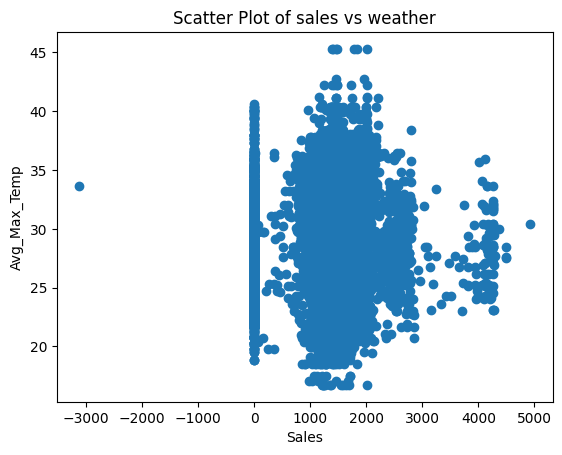

In [52]:
plt.scatter(data['Sales'], data['Avg_Max_Temp'])
plt.xlabel('Sales')
plt.ylabel('Avg_Max_Temp')
plt.title('Scatter Plot of sales vs weather')
plt.show()



2.   Sales yearly behave/ increase


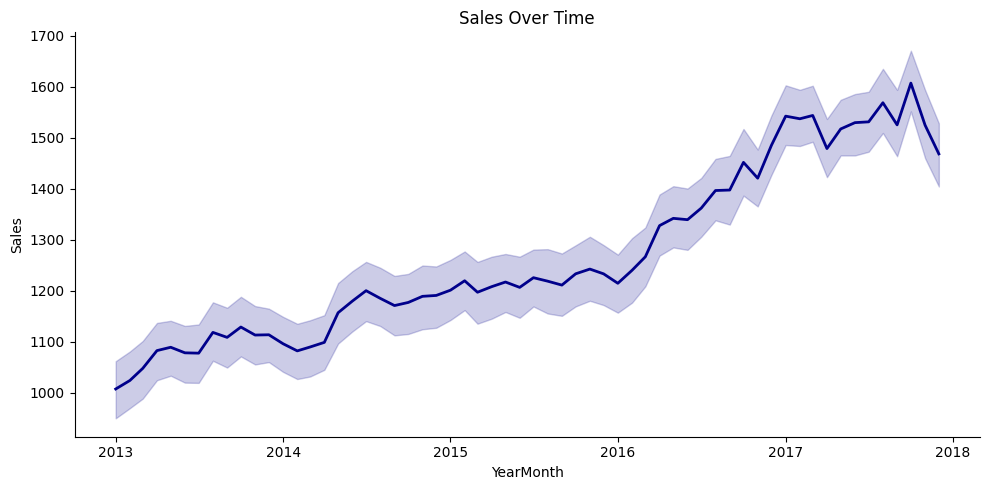

In [53]:
def plot_sales(series):

    # Sort data by YearMonth
    series_sorted = series.sort_values('YearMonth')

    # Plot using matplotlib
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='YearMonth', y='Sales', data=series_sorted, linewidth=2, color='darkblue')

    # Add labels and title
    plt.xlabel('YearMonth')
    plt.ylabel('Sales')
    plt.title('Sales Over Time')

    # Seaborn style and remove extra spines
    sns.despine()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame, assuming your data is stored in 'data'
plot_sales(data)



3.   Correlation analyses





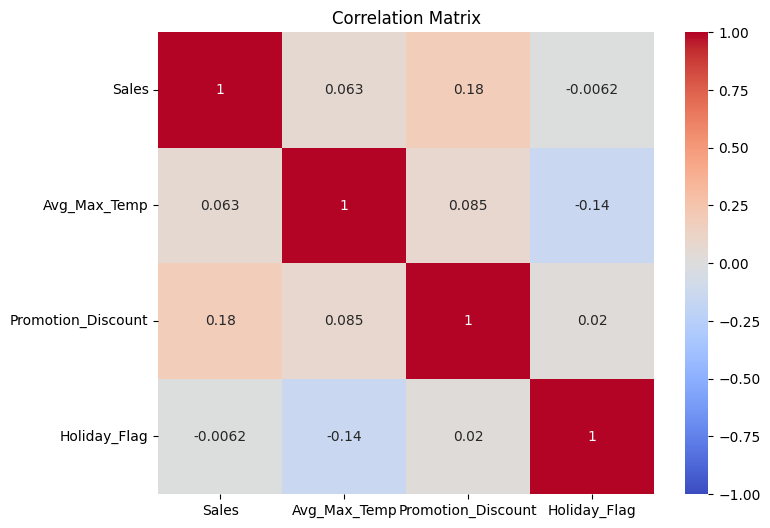

In [54]:
# If 'Promotions' exists and you want to rename it to 'Promotion_Discount'
data['Promotion_Discount'] = data['Promotions']  # Rename as per your dataset

# Create 'Holiday_Flag' if it doesn't exist, using the event columns (e.g., Easter, Christmas)
data['Holiday_Flag'] = (data['Easter Day'] + data['Christmas']).apply(lambda x: 1 if x > 0 else 0)

# Now you can proceed with correlation analysis
correlation_data = data[['Sales', 'Avg_Max_Temp', 'Promotion_Discount', 'Holiday_Flag']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## => We only see; small correlation between promotion-discounts and sales

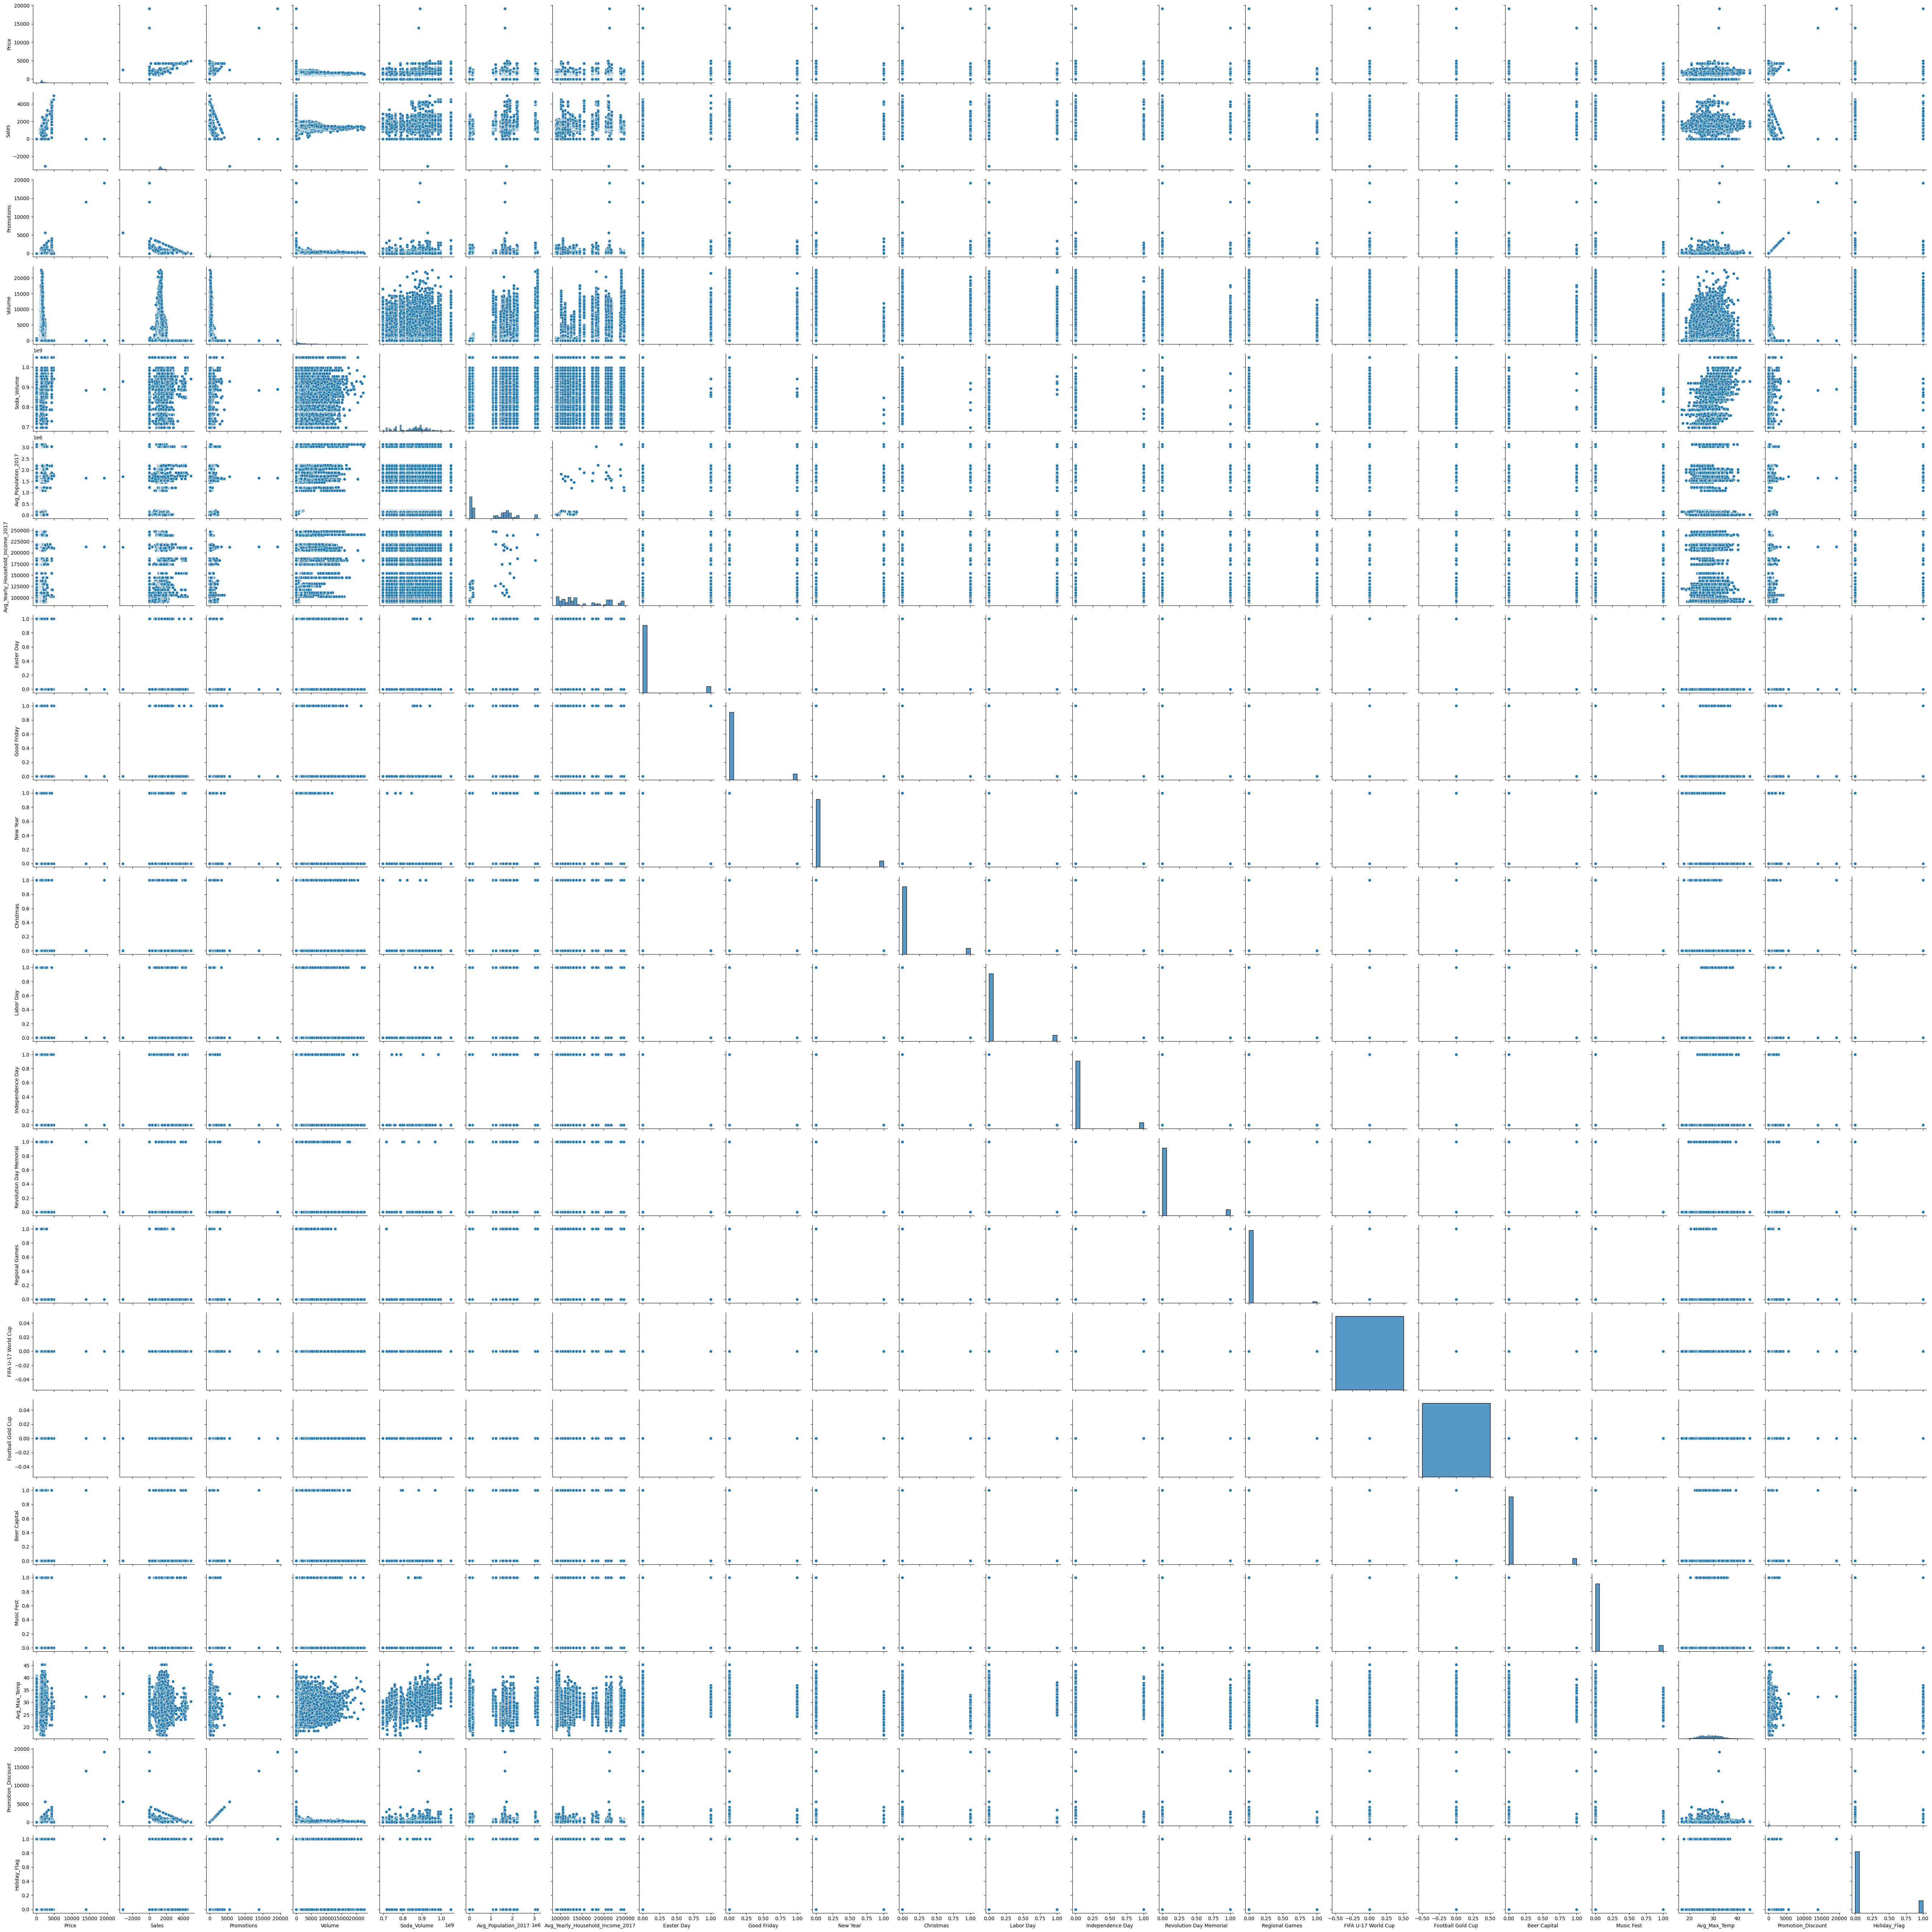

In [55]:
sns.pairplot(data)


In [56]:
data_numeric = data.select_dtypes(include=[nm.number])
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

                                     Price     Sales  Promotions    Volume  \
Price                             1.000000  0.928771    0.534692  0.075554   
Sales                             0.928771  1.000000    0.183857  0.045860   
Promotions                        0.534692  0.183857    1.000000  0.095448   
Volume                            0.075554  0.045860    0.095448  1.000000   
Soda_Volume                       0.242322  0.182194    0.227583  0.031674   
Avg_Population_2017              -0.016340 -0.026705    0.018199  0.432051   
Avg_Yearly_Household_Income_2017  0.012329  0.005546    0.020471  0.332380   
Easter Day                       -0.025103 -0.024239   -0.011401  0.013678   
Good Friday                      -0.025103 -0.024239   -0.011401  0.013678   
New Year                         -0.032083 -0.028188   -0.021015 -0.034280   
Christmas                         0.028319  0.015864    0.038804  0.019976   
Labor Day                        -0.005972 -0.001444   -0.012445

4- Now lets move to implimenting our algorithm;
The target variable (output) appears to be *"sales" wich we will predict using linear regression.

In [57]:
# slecting the inputs and the outputs
import numpy as np

features = ['Price', 'Promotions', 'Volume', 'Avg_Max_Temp']  # Example feature set
target = 'Sales'

# Vectorisation the Xs and the Ys
X = data[features].values
y = data[target].values

# Normalize the features for better gradient descent performance
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

# Add a bias term (intercept) to X (equivalent to X_0 = 1 in linear regression)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize weights (theta) randomly
theta = np.random.randn(X_normalized.shape[1])

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta  # Matrix multiplication
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for _ in range(num_iters):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / m) * (X.T @ errors)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Train the model using gradient descent
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations

theta_optimal, cost_history = gradient_descent(X_normalized, y, theta, alpha, num_iters)

theta_optimal


array([ 1.26729277e+03,  6.79087038e+02, -2.52937418e+02, -2.88518535e-01,
       -5.83248808e-02])

The linear regression model has been trained, and we have obtained the following optimal parameters (weights):

Intercept (bias term): ~1267
Price coefficient: ~679
Promotions coefficient: ~-253
Volume coefficient: ~-0.29
Avg_Max_Temp coefficient: ~-0.058


**
Next Steps:**Evaluate the model: Compare predicted sales with actual sales on the training set.
Plot cost history: Visualize how the cost decreased during gradient descent.
Let’s evaluate the model by calculating predictions and visualizing the cost reduction

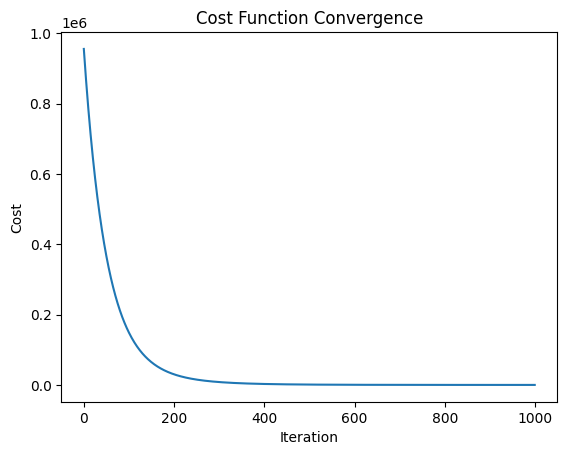

ModuleNotFoundError: No module named 'ace_tools'

In [60]:
!#pip install ace_tools  # Install the ace_tools module using pip
import matplotlib.pyplot as plt

# Predict using the trained model
predictions = X_normalized @ theta_optimal

# Plot the cost history to show convergence
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

# Display a few actual vs predicted values for inspection
results = pd.DataFrame({
    'Actual Sales': y,
    'Predicted Sales': predictions
})

import ace_tools as tools; tools.display_dataframe_to_user(name="Actual vs Predicted Sales", dataframe=results.head(10))


In [59]:
results.head(10)


,Actual Sales,Predicted Sales
0,1033.432731,1034.473784
1,1065.417195,1065.851333
2,1101.133633,1101.297764
3,1138.283357,1138.287109
4,1148.969634,1148.796484
5,1152.156204,1152.017556
6,1186.746188,1185.965820
7,1144.291368,1144.189917
8,1157.884598,1157.609309
9,1142.945273,1142.983474
